In [1]:
import missingno as mno
from sklearn.cluster import KMeans
import pandas as pd
import pickle
import string
import re
import string
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score, train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.decomposition import KernelPCA, PCA
import umap
import plotly.express as px
import plotly.graph_objects as go
import sys
sys.setrecursionlimit(10000)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE, chi2, mutual_info_classif,SelectKBest
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV,train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pickle

In [2]:
base_data = pd.read_pickle('basic_preprocessed_data.pkl')
data = pd.read_pickle('preprocessed_data.pkl')
data_oh = pd.read_pickle('onehot_encoded_clean_data.pkl')
data_cyl = pd.read_pickle('cyclical_encoded_data.pkl')
full_data = pd.read_pickle('full_data.pkl')

In [62]:
 deter_data = pd.read_pickle('regression_imputed_data.pkl')

In [ ]:
# read imputed data

In [5]:
imputed_data_forest = pd.read_pickle('imputed_data_forest_3.pkl')
# imputed_mean = pd.read_pickle('mean_imputed.pkl')
# imputed_em = pd.read_pickle('em_imputed.pkl')

# Initialisation

In [67]:
#  put your data into df 
df = data
df_imp = imputed_data_forest
# df_imp_em = imputed_em
# df_imp_mean = imputed_mean

In [ ]:
categorical_col = ['HouseholdType','Head_EducationLevel','Country']
categorical_df = df[categorical_col]

In [77]:
df =df.drop(['HHsizeMAE', 'farm_income_USD_PPP_pHH_Yr', 'value_crop_produce_USD_PPP_pHH_Yr', 'TVA_USD_PPP_pmae_pday', 'LandOwned','livestock_prodsales_USD_PPP_pHH_Yr'],axis=1)

In [75]:
df_imp_corr = pd.read_pickle('imputed_data_forest_corr.pkl')

In [ ]:
# dummy = df_imp.iloc[:,37:90]
# drop_col = []
# dummy.columns
# for col in dummy.columns:
#     drop_col.append(col)

# numerical_df = df_imp.drop(drop_col,axis=1)

In [ ]:
# we have a lot of features , so we can select features that might be interesting to see their correlation and pair-wise plots for example
# You can set up the features you are interested in the following list
# cols = ['PPI_Likelihood', 'Food_InsecurityLevel','NrofMonthsFoodInsecure','HHsizeMAE','YEAR']
# cols = ['Food_InsecurityLevel','LivestockHoldings','total_income_USD_PPP_pHH_Yr']

In [ ]:
# outliers_col = ['GHGEmissions','NFertInput','Food_Availability_kCal_MAE_day',
# 'Food_Self_Sufficiency_kCal_MAE_day','TVA_USD_PPP_pmae_pday',
# 'total_income_USD_PPP_pHH_Yr',
# 'offfarm_income_USD_PPP_pHH_Yr',
# 'farm_income_USD_PPP_pHH_Yr',
# 'value_farm_produce_USD_PPP_pHH_Yr',
# 'crop_sales_USD_PPP_pHH_Yr',
# 'value_crop_produce_USD_PPP_pHH_Yr',
# 'value_crop_consumed_USD_PPP_pHH_Yr',
# 'livestock_prodsales_USD_PPP_pHH_Yr',
# 'value_livestock_production_USD_PPP_pHH_Yr',
# 'value_livestock_prod_consumed_USD_PPP_pHH_Yr',
# 'LandOwned',
# 'LandCultivated',
# 'LivestockHoldings',
# 'HHsizemembers',
# 'HHsizeMAE']



In [31]:
outliers_col = ['Food_InsecurityLevel']

## Pipeline to compare Imputation techniques 

In [72]:
# give the function the original base_data and the imputed data and the column to compare
def compare_imputation_box(data,imp,imp2,missing_col):
    for col in missing_col:
        fig = go.Figure()
        fig.add_trace(go.Box(y=data[col].values, name='Original'))
        fig.add_trace(go.Box(y=imp[col].values, name='Random forest Imputation'))
        fig.add_trace(go.Box(y=imp2[col].values, name='Regression Imputation'))
        fig.update_layout(title =df[col].name)
        fig.update_layout(legend=dict(
             yanchor="top",
             y=0.99,
             xanchor="left",
             x=0.01
             ))
        fig.update_layout(
           yaxis = dict(
           tickfont = dict(size=20)))
        fig.update_layout(
            xaxis = dict(
            tickfont = dict(size=20)))
        fig.show()
#    fig.add_trace(go.Box(y=imp2["Det" + col].values,name=imp2["Det" + col].name))
   
    

In [83]:
columns = ['PPI_Likelihood']

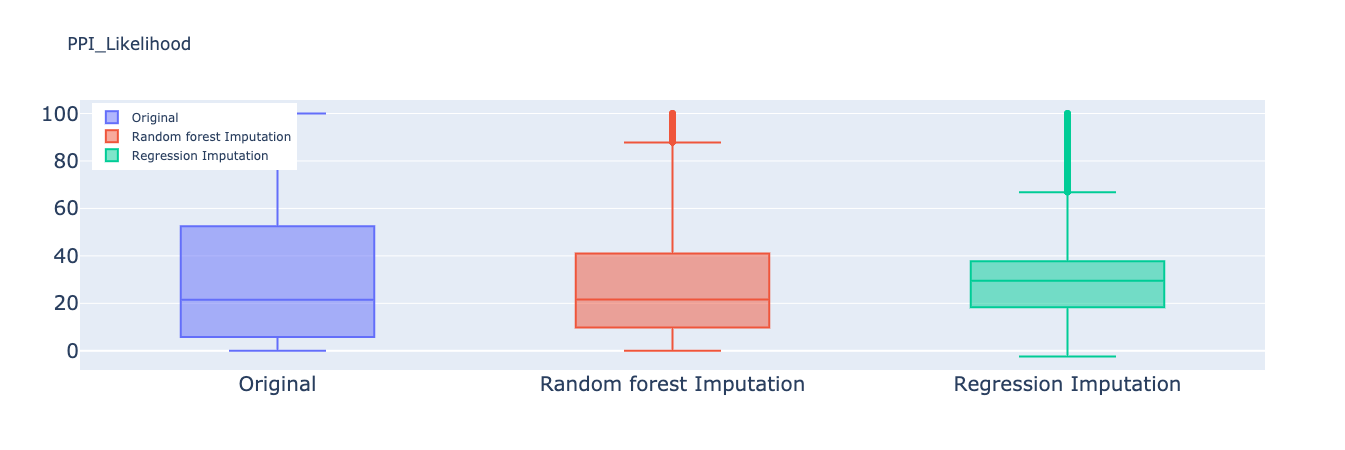

In [84]:
compare_imputation_box(df,df_imp_corr,deter_data,columns)

In [291]:
# give the function the original base_data and the imputed data and the column to compare
def compare_imputation_his(data,imp,missing_col):
    # compare data distributions using hist and outliers with box plots !
    
    for col in missing_col:
        print(col)
        x_0 = np.array(data[col].tolist())
        x_1 = np.array(imp[col].tolist())
        overlap =data.loc[data[col] == imp[col] ]
        x_2 = np.array(overlap[ col ].tolist())
        df =pd.DataFrame(dict(
        series=np.concatenate((["original data"]*len(data[col]),
                               ["Random Forest imputed data"]*len(imp[ col]),
                               ['Region of Overlap']*len(data.loc[data[col] == imp[col] ]))),
        data = np.concatenate((x_0,x_1,x_2))
        ))

        fig = px.histogram(df, x="data", color="series", barmode="overlay",title=col,nbins=40)
        fig.show()

In [ ]:
# x_col = ['total_income_USD_PPP_pHH_Yr',
#         'offfarm_income_USD_PPP_pHH_Yr',
#         'farm_income_USD_PPP_pHH_Yr',
#         'crop_sales_USD_PPP_pHH_Yr',
#           'livestock_prodsales_USD_PPP_pHH_Yr',
#         'value_livestock_production_USD_PPP_pHH_Yr',
#         'value_livestock_prod_consumed_USD_PPP_pHH_Yr'
#        ]
# dummy_df = df[['total_income_USD_PPP_pHH_Yr',
#         'offfarm_income_USD_PPP_pHH_Yr',
#         'farm_income_USD_PPP_pHH_Yr',
#         'crop_sales_USD_PPP_pHH_Yr',
#         'livestock_prodsales_USD_PPP_pHH_Yr',
#         'value_livestock_production_USD_PPP_pHH_Yr',
#         'value_livestock_prod_consumed_USD_PPP_pHH_Yr']]



### box plots

In [ ]:
# box plots to check for outliers 

def box_plots(df):
    unwanted_col = ['YEAR','ITERATION','GPS_LAT','GPS_LON','GPS_ALT','HouseholdType','Head_EducationLevel', 
                    'WorstFoodSecMonth' ,'BestFoodSecMonth','Country']
    for col in df:
        if col not in unwanted_col:
            fig = px.box(df,y=col)
            fig.show()

In [ ]:
# box_plots(df)

#### Visualisation Categorical Data

In [ ]:
# Bar Plot
def vis_categorical():
    fig, ax = plt.subplots(len(categorical_col),figsize = (15, 15))
    fig.subplots_adjust(top=0.9, wspace=2,bottom = 0.5 )
    plt.tight_layout()
    for i in range(len(categorical_col)):
        ax[i].set_xlabel(categorical_col[i])
        ax[i].set_ylabel("Frequency") 
        w_q = df[categorical_col[i]].value_counts()
        w_q = (list(w_q.index), list(w_q.values))
        ax[i].tick_params(axis='both', which='major', labelsize=8.5)
        bar = ax[i].bar(w_q[0], w_q[1], color='steelblue', edgecolor='black', linewidth=1)

# vis_categorical()

#### Heat map correlation 

In [ ]:
# def heatmap():
#     f, ax = plt.subplots(figsize=(30, 30))
#     corr = df.corr()
#     hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
#     f.subplots_adjust(top=0.93)
#     t= f.suptitle('Food Indicators Attributes Correlation Heatmap', fontsize=14)

# heatmap()

In [55]:
df = df[]

In [60]:
df = df[[
        'HouseholdType', 
        'Head_EducationLevel', 
        'WorstFoodSecMonth',
       'BestFoodSecMonth',
       'PPI_Likelihood',
       'score_HDDS_BadSeason',
       'total_income_USD_PPP_pHH_Yr',
       'farm_income_USD_PPP_pHH_Yr',
        'Market_Orientation', 
        'NrofMonthsWildFoodCons',
        'Food_InsecurityLevel']]


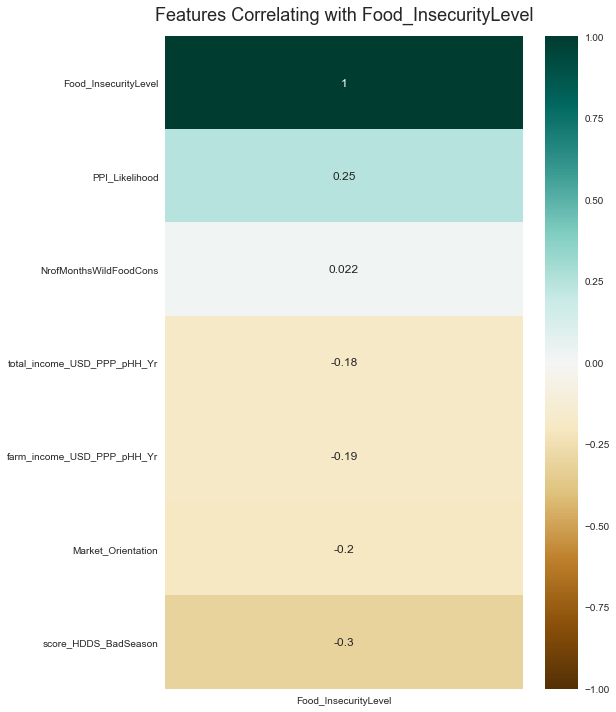

In [61]:
# correlation between independent and dependent variable 
def heatmap_dependent_var():
    for  col in outliers_col:
        plt.figure(figsize=(8, 12))
        heatmap = sns.heatmap(df.corr()[[col]].sort_values(by=col, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
        heatmap.set_title('Features Correlating with ' + col , fontdict={'fontsize':18}, pad=16);
    
heatmap_dependent_var()    

In [ ]:
# cols = ['HHsizeMAE',
#         'HHsizemembers',
#         'total_income',
#         'farm_income',
#         'value_crop_produce',
#        'value_farm_produce',
#        'livestock_prodsales',
#        'value_livestock_production',
#        'TVA',
#        'Food_Availability',
#        'LandOwned',
#        'LandCultivated']

In [ ]:
# dummy_df = df.copy()
# dummy_df = dummy_df.rename(columns={"farm_income_USD_PPP_pHH_Yr": "farm_income",
#                          "value_crop_produce_USD_PPP_pHH_Yr": "value_crop_produce",
#                          "TVA_USD_PPP_pmae_pday" : "TVA",
#                          "value_farm_produce_USD_PPP_pHH_Yr": "value_farm_produce",
#                          "total_income_USD_PPP_pHH_Yr": "total_income",
#                          "livestock_prodsales_USD_PPP_pHH_Yr": "livestock_prodsales",
#                          "value_livestock_production_USD_PPP_pHH_Yr": "value_livestock_production",
#                         "Food_Availability_kCal_MAE_day": "Food_Availability"})



#### Pair wise plots among indicators of interest 

In [ ]:
for i in range(2,len(cols),2):
    fig = px.scatter(dummy_df,x=cols[i-2], y = cols[i-1],height = 400,width=400)
    fig.show()

### PCA Analysis

In [ ]:
X = df_imp.drop(['Food_InsecurityLevel'],axis=1)
Y = df_imp['Food_InsecurityLevel']

####  missing data visualisation 

<AxesSubplot:>

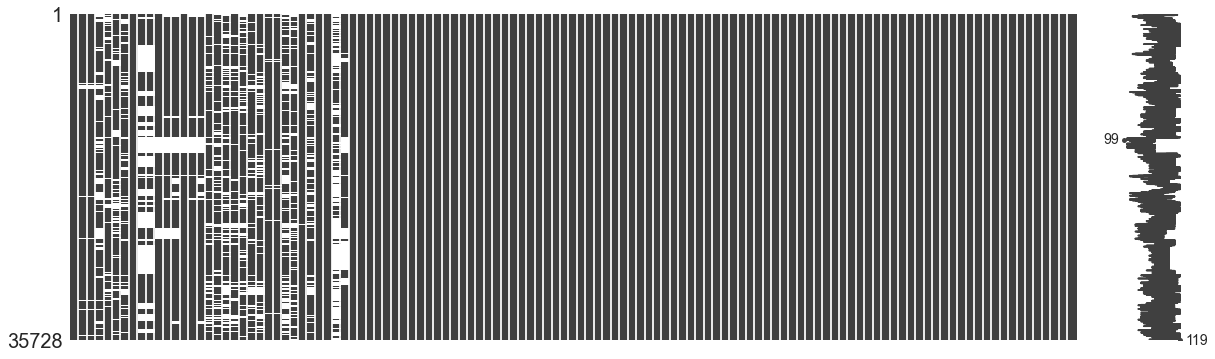

In [298]:
mno.matrix(df, figsize = (20, 6))

In [68]:

missing_data = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum()/len(df)*100)
missing_columns = []
for i in range(len(missing_data)):
        missing_columns.append(missing_data.iloc[i].name)


In [69]:
names = []
for i in range(len(missing_data)):
        names.append(missing_data.iloc[i].name)
values = []
for i in range(len(missing_data)):
        values.append(missing_data.iloc[i][0])

data_1 = {'Features': names,'Missing Data Percentage': values}

In [26]:
df = df.drop(['total_income_USD_PPP_pHH_Yr','offfarm_income_USD_PPP_pHH_Yr','farm_income_USD_PPP_pHH_Yr'
                                                   ,'value_farm_produce_USD_PPP_pHH_Yr','crop_sales_USD_PPP_pHH_Yr','value_crop_produce_USD_PPP_pHH_Yr','value_crop_consumed_USD_PPP_pHH_Yr',
                                                   'livestock_prodsales_USD_PPP_pHH_Yr','value_livestock_production_USD_PPP_pHH_Yr','value_livestock_prod_consumed_USD_PPP_pHH_Yr',
                                                   'Food_Availability_kCal_MAE_day','Food_Self_Sufficiency_kCal_MAE_day'],axis=1)

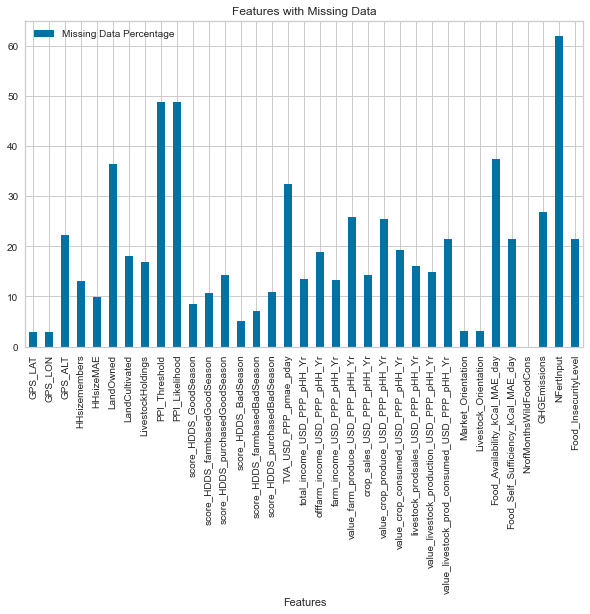

In [70]:
#plot bar chart  of missing data 

# Dictionary loaded into a DataFrame       

dataframe = pd.DataFrame(data=data_1)

 

# Draw a vertical bar chart

dataframe.plot.bar(x="Features", y="Missing Data Percentage", title="Features with Missing Data",figsize=(10,6))
plt.show(block=True)

In [71]:
missing_columns
columns = ['PPI_Likelihood']

['GPS_LAT',
 'GPS_LON',
 'GPS_ALT',
 'HHsizemembers',
 'HHsizeMAE',
 'LandOwned',
 'LandCultivated',
 'LivestockHoldings',
 'PPI_Threshold',
 'PPI_Likelihood',
 'score_HDDS_GoodSeason',
 'score_HDDS_farmbasedGoodSeason',
 'score_HDDS_purchasedGoodSeason',
 'score_HDDS_BadSeason',
 'score_HDDS_farmbasedBadSeason',
 'score_HDDS_purchasedBadSeason',
 'TVA_USD_PPP_pmae_pday',
 'total_income_USD_PPP_pHH_Yr',
 'offfarm_income_USD_PPP_pHH_Yr',
 'farm_income_USD_PPP_pHH_Yr',
 'value_farm_produce_USD_PPP_pHH_Yr',
 'crop_sales_USD_PPP_pHH_Yr',
 'value_crop_produce_USD_PPP_pHH_Yr',
 'value_crop_consumed_USD_PPP_pHH_Yr',
 'livestock_prodsales_USD_PPP_pHH_Yr',
 'value_livestock_production_USD_PPP_pHH_Yr',
 'value_livestock_prod_consumed_USD_PPP_pHH_Yr',
 'Market_Orientation',
 'Livestock_Orientation',
 'Food_Availability_kCal_MAE_day',
 'Food_Self_Sufficiency_kCal_MAE_day',
 'NrofMonthsWildFoodCons',
 'GHGEmissions',
 'NFertInput',
 'Food_InsecurityLevel']

In [284]:
# The function random_imputation replaces the missing values with some random observed values of the variable.
# The method is repeated for all the variables containing missing values ,
# after which they serve as parameters in the regression model to estimate other variable values.
# Simple Random Imputation is one of the crude methods since it ignores all the other available data and thus it's very rarely used.
# But it serves as a good starting point for regression imputation.

def random_imputation(df, feature):
    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)  
    return df

In [285]:
# drop id columns not necessary 
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

### Deterministic Regression Imputation 

In [286]:
# Deterministic Regression Imputation 


deter_data = pd.DataFrame(columns = [ name for name in missing_columns])

for feature in missing_columns:
        
    deter_data[feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    #Create a Linear Regression model to estimate the missing data
    model = LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[df[feature].isnull(),feature] = model.predict(df[parameters])[df[feature].isnull()]

<AxesSubplot:>

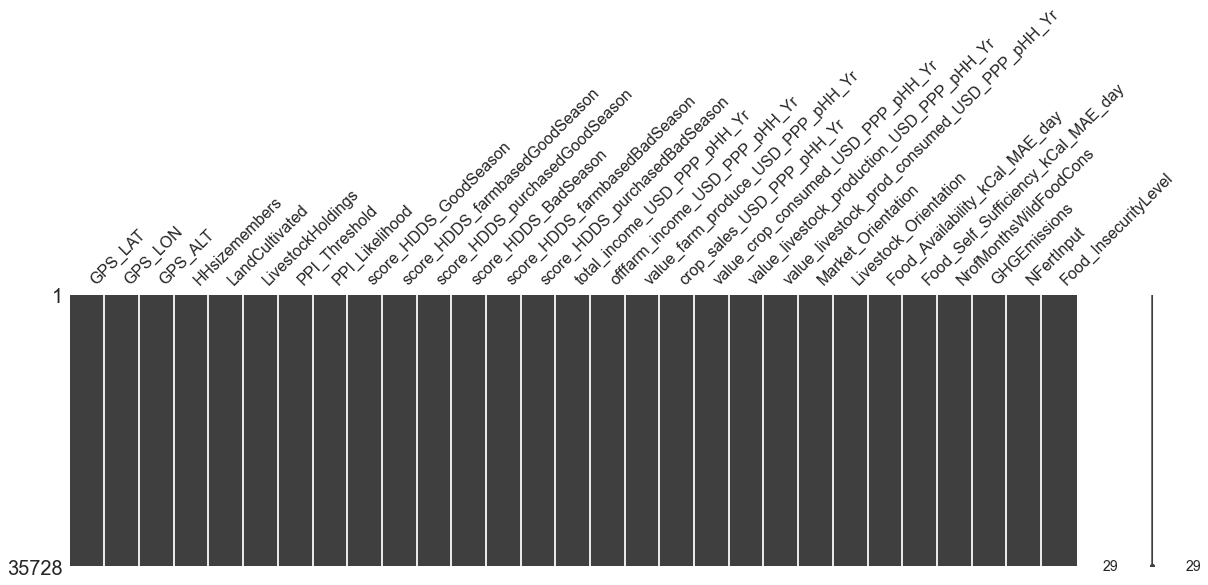

In [303]:
mno.matrix(deter_data, figsize = (20,5))

## Imputed vs original data

In [305]:
# compare_imputation_box(df,df_imp,deter_data,missing_columns)
# compare_imputation_his(df,df_imp,missing_columns)

## UMAP  and PCA  

In [ ]:
import umap.umap_ as umap
import umap.plot
umap.plot.output_notebook()
from bokeh.plotting import show, save, output_notebook, output_file


### Data scaling

In [6]:
# test 1
X = df_imp.drop(['Food_InsecurityLevel'],axis=1)
Y = df_imp['Food_InsecurityLevel']

X = MinMaxScaler().fit_transform(X)

In [ ]:
# # test 2
# X = df_imp_corr.drop(['Food_InsecurityLevel'],axis=1)
# Y = df_imp_corr['Food_InsecurityLevel']

# X = MinMaxScaler().fit_transform(X)

In [ ]:
# # test 3
# X = numerical_df.drop(['Food_InsecurityLevel'],axis=1)
# Y = numerical_df['Food_InsecurityLevel']

# X = MinMaxScaler().fit_transform(X)

In [ ]:


mapper = umap.UMAP(n_neighbors=10,
                      min_dist=0.0).fit(X)

hover_data = pd.DataFrame({'index':np.arange(35728),
                           'label':Y})
hover_data['item'] = hover_data.label.map(
    {
        '1':'FoodSecure',
        '2':'MildlyFI',
        '3':'ModeratelyFI',
        '4':'SeverelyFI',
     
    }
)

p = umap.plot.interactive(mapper, labels=Y, hover_data=hover_data, point_size=2)
umap.plot.show(p)

In [ ]:
pca = PCA()
pca = pca.fit(X)
pca_x = pca.transform(X)
per_var = np.round(pca.explained_variance_ratio_ * 100,decimals=1 )
labels =  ['PC' + str(x)  for x in range(1, len(per_var) + 1)]

In [ ]:
per_var[1]

In [ ]:
plt.bar(x=range(1,len(per_var)+1),height =per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.figure(figsize=(10,15))
plt.show()

# Feature Selection 

In [7]:
# split data into test train 
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, test_size=0.33, random_state=42)
Train_Y = np.array(Train_Y)
Test_Y = np.array(Test_Y)

In [8]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

In [10]:
# feature_selection_df = pd.concat([numerical_df,categorical_df],axis=1)

In [11]:
selections = ['CHI-2','Mutual Information','Recursive Feature Elimination']

## CHI-2 

In [ ]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(Train_X,Train_Y)
chi_support = fs.get_support()
X_train_fs = fs.transform(Train_X)
X_test_fs = fs.transform(Test_X)


## Mutual Information

In [ ]:
fs_ = SelectKBest(score_func=mutual_info_classif, k='all')
fs_.fit(Train_X,Train_Y)
mi_support = fs_.get_support()
X_train_fs_ = fs_.transform(Train_X)
X_test_fs_ = fs_.transform(Test_X)

## Recursive Feature Elimination (RFE)

In [ ]:
model = LogisticRegression(solver='liblinear')
rfe = RFE(estimator = model,n_features_to_select=36)
rfe.fit(Train_X,Train_Y)
rfe_train_X = rfe.transform(Train_X)
rfe_test_X = rfe.transform(Test_X)

### Comparism  RFE, CHI-2 and Mutual Information 

In [ ]:
pd.set_option('display.max_rows', 500)
indexes = df_imp_corr.drop(['Food_InsecurityLevel'],axis=1)
best_features = pd.DataFrame({ 'RankRFE': rfe.support_,
                               'RankCHI-2': chi_support, 
                               'RankMI': mi_support,
                               'Feature': indexes.columns})
best_features.set_index('Feature')


In [ ]:

best_features['Total'] = np.sum(best_features, axis=1)
# display the top 100
best_features = best_features.sort_values(['Total','Feature'] , ascending=False)
best_features.index = range(1, len(best_features)+1)

In [ ]:
best_features

In [ ]:
top_score = best_features.loc[best_features['Total'] == 3 ]

In [ ]:
top_k_features = top_score['Feature'].tolist()

In [ ]:
X_ = df_imp_corr.drop(['Food_InsecurityLevel'],axis=1)
X_ = X_[top_k_features]
X_ = MinMaxScaler().fit_transform(X_)
Train_X_, Test_X_, Train_Y, Test_Y = train_test_split(X_,Y,test_size=0.33, random_state=0)

### Model with top_k  average features 

In [ ]:
C = [1,10]
parameter_space = [ {'C': C}]
model = LogisticRegression(max_iter = 2500)
clf_gs = GridSearchCV(model,parameter_space,cv =skf,n_jobs=-1,verbose=True)
clf_gs.fit(Train_X_,Train_Y)
y_pred = clf_gs.predict(Test_X_)
report = classification_report(Test_Y, y_pred)
score = accuracy_score(Test_Y,y_pred)
print('accuracy score : ', score)
print(report)
print('---------------------------')

### bar plots of scores

In [ ]:
best_features_RFE = best_features.loc[best_features['RankRFE'] == True ]

RFE_top20 = best_features_RFE['Feature'].tolist()

In [ ]:
# fig = px.bar(best_features_RFE, x='RankRFE', y='Feature')
# fig.show()

In [ ]:
best_features_CHI = best_features.sort_values(by ='RankCHI-2',ascending=False)
best_features_MI =  best_features.sort_values(by='RankMI',ascending=False)


In [ ]:
CHI_top20 = best_features_CHI['Feature'].iloc[:20].tolist()
MI_top20 = best_features_MI['Feature'].iloc[:20].tolist()

In [ ]:
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

In [ ]:
CHI_top20

In [ ]:
MI_top20

### PLUG IN MODEL TO BE USED 

In [12]:
def basic_model_fs(Train_X,Train_Y,Test_X,Test_Y):
    C = [1,10]
    parameter_space = [ {'C': C}]
    model = LogisticRegression(max_iter = 2500)
    clf_gs = GridSearchCV(model,parameter_space,cv =skf,n_jobs=-1,verbose=True)
    clf_gs.fit(Train_X,Train_Y)
    y_pred = clf_gs.predict(Test_X)
    report = classification_report(Test_Y, y_pred,output_dict=True)
#     score = accuracy_score(Test_Y,y_pred)
    return report 
#     print(fs)
#     print('accuracy score : ', score)
#     print(report)
#     print('---------------------------')


96

### Plot graph of f1 scores against different k values for model chosen

In [17]:
reports = { '10': {'MI': None , 'CHI-2': None , 'RFE': None },
          '20': {'MI': None , 'CHI-2': None , 'RFE': None },
          '30': {'MI': None , 'CHI-2': None , 'RFE': None },
          '40': {'MI': None , 'CHI-2': None , 'RFE': None },
          '50': {'MI': None , 'CHI-2': None , 'RFE': None },
          '60': {'MI': None , 'CHI-2': None , 'RFE': None },
          '70': {'MI': None , 'CHI-2': None , 'RFE': None },
          '80': {'MI': None , 'CHI-2': None , 'RFE': None },
          '95': {'MI': None , 'CHI-2': None , 'RFE': None }}
num_features= [10,20,30,40,50,60,70,80,95]
for k in num_features:
    fs_ = SelectKBest(score_func=mutual_info_classif, k=k)
    fs_.fit(Train_X,Train_Y)
    mi_support = fs_.get_support()
    X_train_fs_ = fs_.transform(Train_X)
    X_test_fs_ = fs_.transform(Test_X)
    report = basic_model_fs(X_train_fs_,Train_Y,X_test_fs_,Test_Y)
    reports[str(k)]['MI'] = report
    fs = SelectKBest(score_func=chi2, k=k)
    fs.fit(Train_X,Train_Y)
    chi_support = fs.get_support()
    X_train_fs = fs.transform(Train_X)
    X_test_fs = fs.transform(Test_X)         
    report = basic_model_fs(X_train_fs,Train_Y,X_test_fs,Test_Y)
    reports[str(k)]['CHI-2'] = report
    model = LogisticRegression(solver='liblinear')
    rfe = RFE(estimator = model,n_features_to_select=k)
    rfe.fit(Train_X,Train_Y)
    rfe_train_X = rfe.transform(Train_X)
    rfe_test_X = rfe.transform(Test_X)
    report = basic_model_fs(rfe_train_X,Train_Y,rfe_test_X,Test_Y)
    reports[str(k)]['RFE'] = report
    

scores_CHI2 = []
scores_MI = []
scores_RFE = []
features_CHI2 = []
features_MI = []
features_RFE = []
    
Features = ['CHI-2','RFE','MI']

ks = ['10','20','30','40','50','60','70','80','95']
for k in ks:
    scores_CHI2.append(reports[k]['CHI-2']['macro avg']['f1-score'])
    scores_MI.append(reports[k]['MI']['macro avg']['f1-score'])
    scores_RFE.append(reports[k]['RFE']['macro avg']['f1-score'])

for index in range(len(scores_CHI2)):
    features_CHI2.append('CHI squared')

for index in range(len(scores_MI)):
    features_MI.append('Mutual Information')

for index in range(len(scores_RFE)):
    features_MI.append('Recursive Feature Elimination')
 

In [17]:
num = [10,20,30,40,50,60,70,80,95,10,20,30,40,50,60,70,80,95,10,20,30,40,50,60,70,80,95]
scores_CHI2.extend(scores_MI)
scores_CHI2.extend(scores_RFE)
features_CHI2.extend(features_MI)
features_CHI2.extend(features_RFE)



dicts = {'num_features': num, 'f1_scores':scores_CHI2 ,'Method':features_CHI2}
df = pd.DataFrame.from_dict(dicts)

import plotly.express as px


fig = px.line(df, x='num_features', y="f1_scores", color='Method')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()